<a href="https://colab.research.google.com/github/lokendrasinha/CRP-Training/blob/main/decisiontree_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd  # Import the pandas library for data manipulation and analysis (e.g., DataFrames).
import numpy as np  # Import the numpy library for numerical operations, especially array manipulation.
import matplotlib.pyplot as plt  # Import the matplotlib.pyplot module for creating static, interactive, and animated visualizations.
import seaborn as sns  # Import the seaborn library for statistical data visualization, built on matplotlib.

from sklearn.datasets import load_wine  # Import the load_wine dataset from scikit-learn, a classic dataset for classification.
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Import DecisionTreeClassifier for building a decision tree model
                                                          # and plot_tree for visualizing the trained tree.
from sklearn.model_selection import train_test_split, GridSearchCV  # Import train_test_split for splitting data into training and testing sets,
                                                                  # and GridSearchCV for hyperparameter tuning using cross-validation.
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay # Import metrics for evaluating model performance:
                                                                                          # classification_report: text summary of precision, recall, F1-score.
                                                                                          # confusion_matrix: a table summarizing prediction results.
                                                                                          # ConfusionMatrixDisplay: for visualizing the confusion matrix.

In [2]:
# Load the wine dataset from sklearn
wine = load_wine()

# Convert to pandas DataFrame
X = pd.DataFrame(wine.data, columns=wine.feature_names)  # Features
y = pd.Series(wine.target)  # Target classes

# Check the shape and preview the data
print("Features Shape:", X.shape)
print("Target Classes:", np.unique(y))
X.head()


Features Shape: (178, 13)
Target Classes: [0 1 2]


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training samples:",X_train.shape[0])
print("Testing samples : ",X_test.shape[0])



Training samples: 142
Testing samples :  36


In [4]:
# Initialize and train the model with default parameters
dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(X_train, y_train)

# Make predictions
y_pred_base = dt_base.predict(X_test)

🔹 Baseline Model Performance:
              precision    recall  f1-score   support

     class_0       0.93      0.93      0.93        14
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



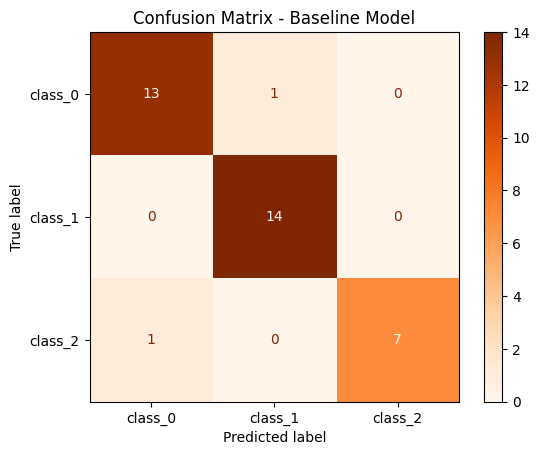

In [5]:
# Classification report
print("🔹 Baseline Model Performance:")
print(classification_report(y_test, y_pred_base, target_names=wine.target_names))

# Confusion matrix visualization
cm_base = confusion_matrix(y_test, y_pred_base)
disp_base = ConfusionMatrixDisplay(confusion_matrix=cm_base, display_labels=wine.target_names)
disp_base.plot(cmap="Oranges")
plt.title("Confusion Matrix - Baseline Model")
plt.show()

In [6]:
# We'll search for the best combination of parameters using cross-validation
param_grid = {
    'criterion': ['gini', 'entropy'],          # Splitting criteria
    'max_depth': [3, 5, 7, 10, None],          # Depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples to split an internal node
    'min_samples_leaf': [1, 2, 4]              # Minimum number of samples in a leaf node
}

# GridSearchCV will automatically test all combinations of the above parameters
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,                   # 5-fold cross-validation
    scoring='accuracy',    # Evaluation metric
    n_jobs=-1              # Use all available CPU cores
)


# Fit to training data
grid_search.fit(X_train, y_train)

# Print a confirmation message indicating that the best parameters have been found.
print("✅ Best Parameters Found:")
# Print the dictionary containing the best parameters found by the grid search.
# grid_search.best_params_ is an attribute of the GridSearchCV object that stores
# the parameter setting that resulted in the best score on the held-out data.
print(grid_search.best_params_)

✅ Best Parameters Found:
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}



🔹 Tuned Model Performance:
              precision    recall  f1-score   support

     class_0       1.00      0.93      0.96        14
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



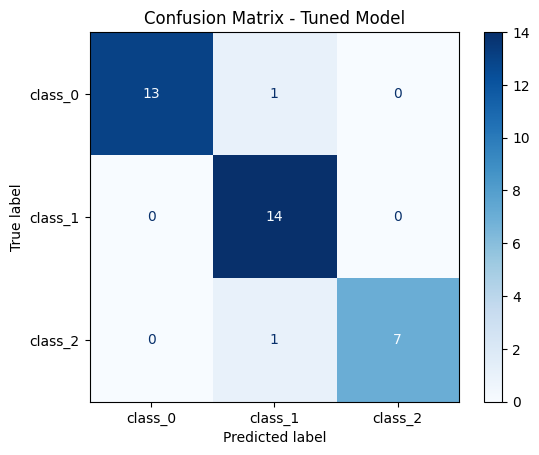

In [7]:
# ✅ Retrieve the best model (Decision Tree) found by GridSearchCV after tuning hyperparameters
best_dt = grid_search.best_estimator_

# 🔍 Use the tuned model to make predictions on the test dataset
y_pred_best = best_dt.predict(X_test)

# 📋 Print the classification report, which includes:
# - Precision: Correctly predicted positives out of total predicted positives
# - Recall: Correctly predicted positives out of actual positives
# - F1-score: Harmonic mean of precision and recall
# - Support: Number of actual occurrences for each class in the test set
print("\n🔹 Tuned Model Performance:")
print(classification_report(y_test, y_pred_best, target_names=wine.target_names))

# 🔢 Generate a confusion matrix to compare true labels with predicted labels
cm_best = confusion_matrix(y_test, y_pred_best)

# 🖼️ Display the confusion matrix as a heatmap-style visual
# Helps identify which classes are being correctly/incorrectly predicted
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=wine.target_names)
disp_best.plot(cmap="Blues")  # Use blue color palette for better visual appeal

# 🏷️ Add title to clearly label the visualization
plt.title("Confusion Matrix - Tuned Model")

# 📢 Show the confusion matrix plot
plt.show()

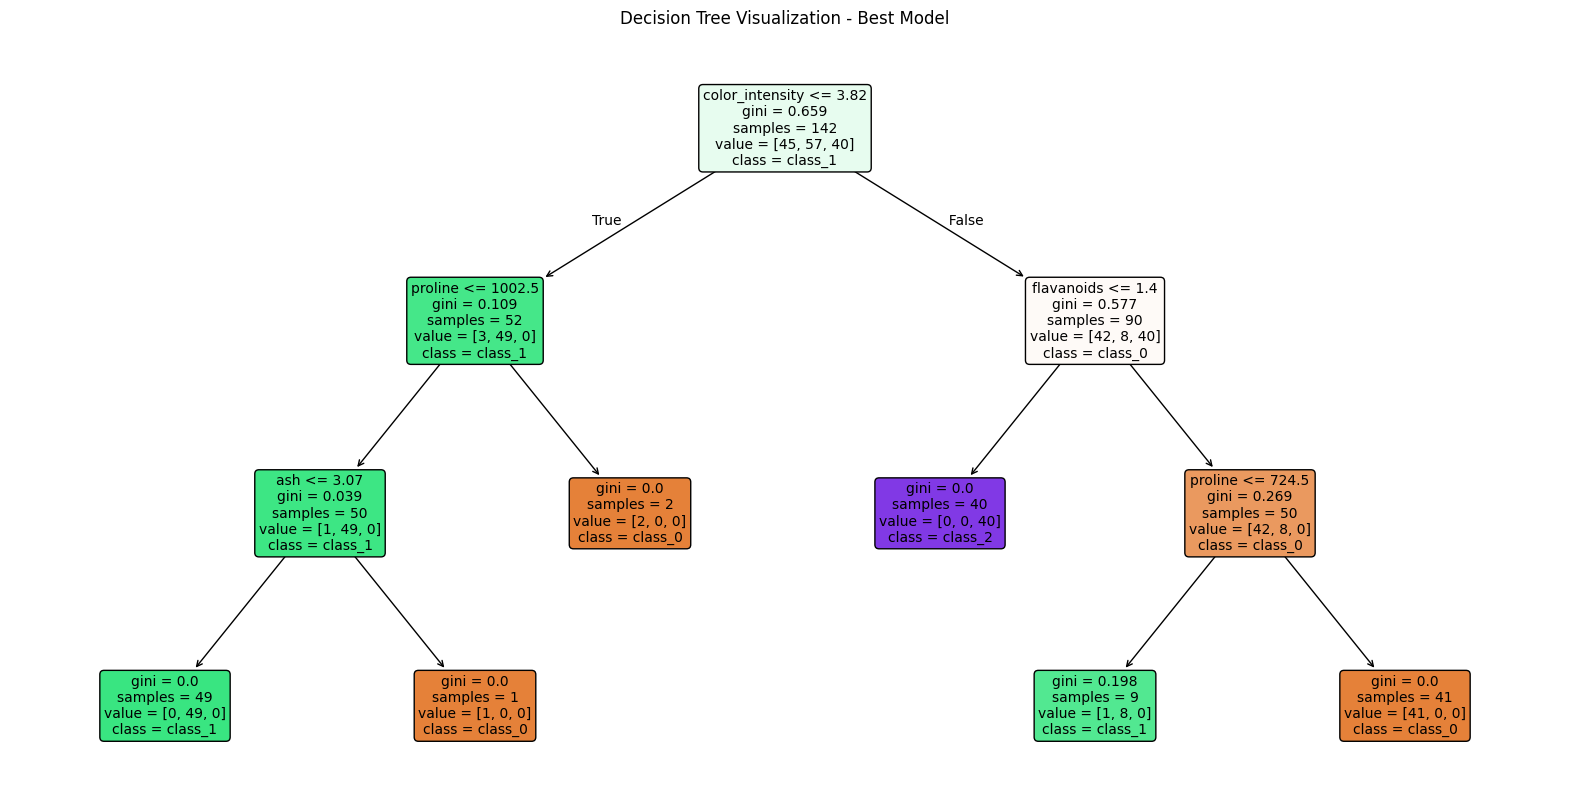

In [8]:
# 🖼️ Set the size of the plot to make the decision tree more readable
plt.figure(figsize=(20, 10))

# 🌳 Plot the structure of the trained decision tree using sklearn's built-in function
plot_tree(
    best_dt,                            # The best decision tree model after hyperparameter tuning
    feature_names=wine.feature_names,   # List of all feature names used in training
    class_names=wine.target_names,      # Target class labels (e.g., wine types)
    filled=True,                        # Fill the nodes with colors to represent class distributions
    rounded=True,                       # Rounded corners for better aesthetics
    fontsize=10                         # Font size of the text within nodes
)

# 🏷️ Add a title to the plot for context
plt.title("Decision Tree Visualization - Best Model")

# 📢 Display the plot on screen
plt.show()

/tmp/ipython-input-9-597653226.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x='Importance', y='Feature', palette="viridis")


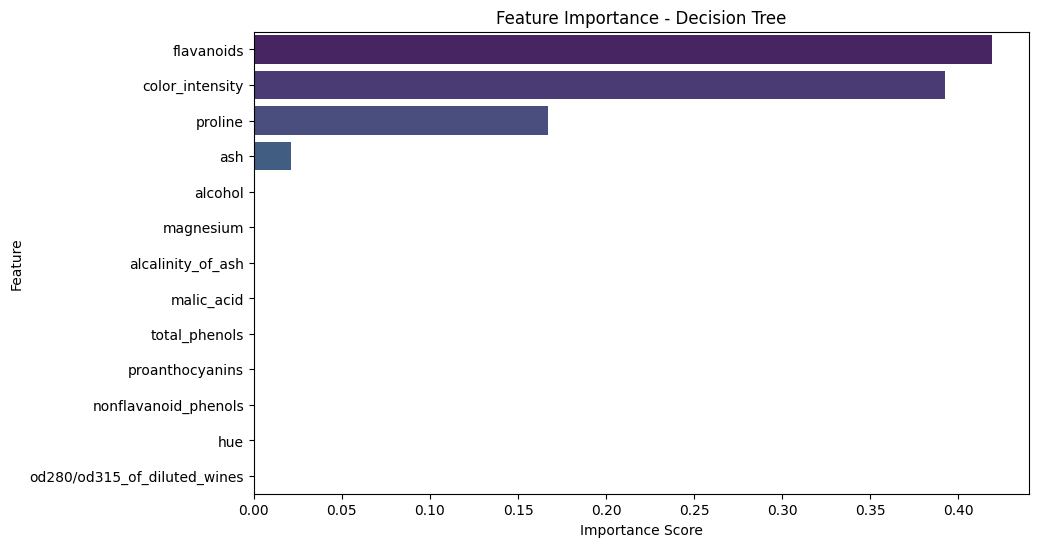

In [9]:
# 🔍 Extract the importance scores for each feature from the trained decision tree model
# These scores indicate how much each feature contributes to reducing impurity in decision-making
feat_importance = best_dt.feature_importances_

# 📊 Create a pandas DataFrame for better visualization and sorting
# This helps us associate each feature name with its importance score
feat_df = pd.DataFrame({
    'Feature': wine.feature_names,        # Column names from the dataset
    'Importance': feat_importance         # Calculated importance from the decision tree
})

# 🔽 Sort the DataFrame in descending order so that the most important features appear on top
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# 🖼️ Create a horizontal bar plot to visualize feature importances
# This helps in understanding which features are contributing the most to the model
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Use seaborn's barplot to plot importance values
sns.barplot(data=feat_df, x='Importance', y='Feature', palette="viridis")

# Add a title and axis labels for better readability
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Show the plot
plt.show()


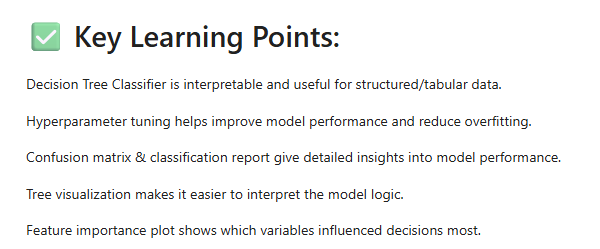